<a href="https://colab.research.google.com/github/sg758253/sg1205/blob/main/ADVDS/project5/letter_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project5:**  The goal of this assignment is to recognize letters using voting and ensemble classifiers. The Letter Recognition dataset (Links to an external site.) contains 20,000 samples, where each sample is a vector of 16 geometric/statistical features about a letter *italicised text*

In [43]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [44]:
# Read csv
df= pd.read_csv('https://raw.githubusercontent.com/bforoura/AML/master/letters.csv')
df

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10,5,8,3,4,10,7,8,12,10,9,2,9,2,6,C
19996,4,7,6,5,3,7,8,2,10,12,6,8,1,9,6,8,Z
19997,4,8,4,6,4,7,8,7,4,10,7,6,3,9,3,7,O
19998,4,11,4,8,3,0,2,4,6,1,0,7,0,8,0,8,L


In [45]:
#Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x-box   20000 non-null  int64 
 1   y-box   20000 non-null  int64 
 2   width   20000 non-null  int64 
 3   high    20000 non-null  int64 
 4   onpix   20000 non-null  int64 
 5   x-bar   20000 non-null  int64 
 6   y-bar   20000 non-null  int64 
 7   x2bar   20000 non-null  int64 
 8   y2bar   20000 non-null  int64 
 9   xybar   20000 non-null  int64 
 10  x2ybr   20000 non-null  int64 
 11  xy2br   20000 non-null  int64 
 12  x-ege   20000 non-null  int64 
 13  xegvy   20000 non-null  int64 
 14  y-ege   20000 non-null  int64 
 15  yegvx   20000 non-null  int64 
 16  class   20000 non-null  object
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [46]:
# Check is there any missing values
df.isnull().sum()

x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
class    0
dtype: int64

No value is missing in this dataset

In [47]:
df.dtypes

x-box     int64
y-box     int64
width     int64
high      int64
onpix     int64
x-bar     int64
y-bar     int64
x2bar     int64
y2bar     int64
xybar     int64
x2ybr     int64
xy2br     int64
x-ege     int64
xegvy     int64
y-ege     int64
yegvx     int64
class    object
dtype: object

Only target column 'class' is object. Others are numeric.


Task 1. Prepare the training dataset for classification by performing transformations such as encoding, imputing, etc., as needed.

In [48]:
# drop target column class

X= df.drop(['class'], axis=1) #features
Y = df['class'] #target

In [49]:
# import library
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(Y)
Y = pd.DataFrame(labelEncoder.transform(Y))
Y=Y[0]
print(X.shape,Y.shape)

(20000, 16) (20000,)


Task 2. Plot label frequencies to verify that the letters A-Z are well-represented in the dataset.

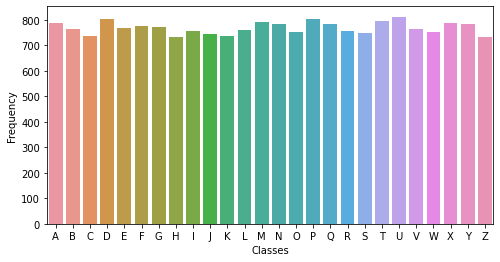

In [50]:
#plot for frequency and target class 
plt.subplots(figsize=(8,4))
sns.barplot(x = df['class'].value_counts().sort_index(ascending=True).index , y = df['class'].value_counts().sort_index(ascending=True).values);
plt.xlabel('Classes');
plt.ylabel('Frequency');


In the dataset, all of the letters from A to Z are present.

Task 3. Create a variety of classification models such as decision tree, random forest, extra trees, SVM, SGD, etc.

In [51]:
# import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# create decision trees 
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# create svc linear
svc_linear = SVC(kernel='linear', random_state=42, probability=True)

# create svc poly
svc_poly = SVC(kernel='poly', random_state=42, probability=True)

# create svc rbf
svc_rbf = SVC(kernel='rbf', random_state=42, probability=True)

# create random forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# create extra trees
etc = ExtraTreesClassifier(random_state=42)

#create sgd
sgd = SGDClassifier(loss = 'log', random_state=42)

Task 4. Train each model separately and cross-validate using cross_validate_model() [mentioned in assignment]

In [52]:
# import library
from sklearn.model_selection import KFold, cross_val_score

# train and cross validate method
def cross_validate_model (classifier_model, X, y):
           kfold = KFold(n_splits=3, shuffle=True, random_state=10)
          # perform model cross validation on the shuffled folds
           results = cross_val_score(classifier_model, X, y, cv=kfold)
           # return the mean score for all folds
           return results.mean()

# cross validate
dt_entropy_score = cross_validate_model(dt_entropy , X, Y)
dt_gini_score = cross_validate_model(dt_gini , X, Y)
svc_rbf_score = cross_validate_model(svc_rbf , X, Y)
svc_poly_score = cross_validate_model(svc_poly , X, Y)
svc_linear_score = cross_validate_model(svc_linear , X, Y)
rfc_score = cross_validate_model(rfc , X, Y)
etc_score = cross_validate_model(etc , X, Y)
sgd_score = cross_validate_model(sgd , X, Y)

print("Decision Tree Entropy Score:", dt_entropy_score)
print("Decision Tree Gini Score:", dt_gini_score)
print("SVC Linear Score:", svc_linear_score )
print("SVC Poly Score", svc_poly_score)
print("SVC RBF Score:", svc_rbf_score)
print("Random Forest Classifier Score:", rfc_score)
print("Extra Tree Classifier Score:", etc_score)
print("SGD Score:", sgd_score)

Decision Tree Entropy Score: 0.8712997743452161
Decision Tree Gini Score: 0.8656999193244658
SVC Linear Score: 0.8503998367438363
SVC Poly Score 0.9425498647059847
SVC RBF Score: 0.9194501046024807
Random Forest Classifier Score: 0.9585999547907393
Extra Tree Classifier Score: 0.9681999623391168
SGD Score: 0.5542023678894062


Task 5. Train the voting classifier model and cross-validate as shown above

In [53]:
 # import library for voting ensemble made by above models
from sklearn.ensemble import VotingClassifier

# voting classifier
hard_voting_clf = VotingClassifier(estimators=[('dt_entropy', dt_entropy), 
                                               ('dt_gini', dt_gini), 
                                               ('svc_linear', svc_linear), 
                                               ('svc_poly',svc_poly),
                                               ('svc_rbf', svc_rbf),
                                               ('rfc', rfc), 
                                               ('etc', etc), 
                                               ('sgd', sgd)],
                                   voting='hard')

hard_voting_score = cross_validate_model(hard_voting_clf, X, Y)
print("Voting Ensemble Score:", hard_voting_score)

Voting Ensemble Score: 0.9567499122793635


Task 6. Plot the obtained accuracy scores in a bar chart. Has the voting classifier outperformed each individual model? Explain why or why not.

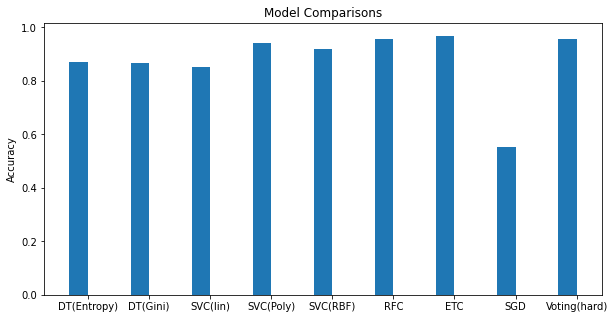

In [65]:
# Plotting all models

labels = ['DT(Entropy)', 'DT(Gini)', 'SVC(lin)', 'SVC(Poly)', 'SVC(RBF)', 'RFC', 'ETC', 'SGD', 'Voting(hard)']
training_scores = [dt_entropy_score, dt_gini_score, svc_linear_score , svc_poly_score, svc_rbf_score, rfc_score, etc_score,  sgd_score, hard_voting_score]

x = np.arange(len(labels))
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, training_scores, width)
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.title('Model Comparisons')
plt.show()

The Voting Classifier performs better than most models.  it does not outperform all models. Extra Tree Classifier (ETC) and Random Forest Classifier (RFC) are better than voting classifier model. Because Each classifier votes for a class, and the class with the most votes wins. As a result, several of the composing models are not adequately calibrated.

Task 7. Plot feature_importances discovered by the random forest model to get a plot similar to this one shown below. What do these values mean, and do all tree models agree on the importance of features?

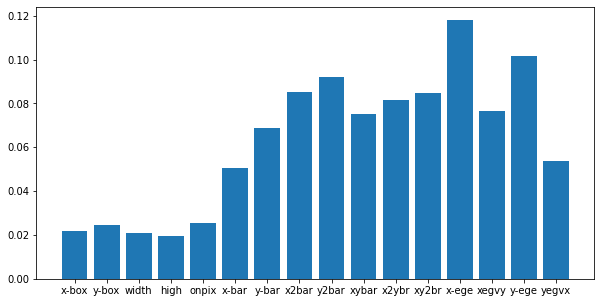

In [55]:
#import library
import matplotlib.pyplot as pyplot

rfc.fit(X,Y)
importance = rfc.feature_importances_

pyplot.figure(figsize=[10, 5])
pyplot.bar(X.columns, importance)
pyplot.show()

In [56]:
# summarize feature importances
feature_importances = pd.DataFrame(importance,index = X.columns,columns=['importance']).sort_values('importance',  ascending=False)
print(feature_importances)

       importance
x-ege    0.118090
y-ege    0.101740
y2bar    0.092046
x2bar    0.085058
xy2br    0.084570
x2ybr    0.081643
xegvy    0.076381
xybar    0.075350
y-bar    0.068983
yegvx    0.053680
x-bar    0.050486
onpix    0.025402
y-box    0.024572
x-box    0.021588
width    0.020938
high     0.019474


In [57]:
# get feature importances from the dt (entropy) model
dt_entropy.fit(X, Y);
dt_entropy_importance =dt_entropy.feature_importances_

feature_importances_dt_entropy = pd.DataFrame(dt_entropy_importance,index = X.columns, columns=['dt_entropy_importance']).sort_values('dt_entropy_importance',  ascending=False)
print(feature_importances_dt_entropy )

       dt_entropy_importance
x-ege               0.175488
y-ege               0.158506
xy2br               0.106462
xegvy               0.090029
y2bar               0.082155
y-bar               0.077566
x2bar               0.075118
xybar               0.060705
yegvx               0.058899
x2ybr               0.058653
x-bar               0.019362
y-box               0.010114
high                0.008385
onpix               0.008256
x-box               0.006172
width               0.004130


In [58]:
# get feature importances from the dt (gini) model
dt_gini.fit(X, Y);
dt_gini_importance = dt_gini.feature_importances_
feature_importances_dt_gini_importance  = pd.DataFrame(dt_gini_importance ,index = X.columns,columns=['dt_gini_importance ']).sort_values('dt_gini_importance ',  ascending=False)
print(feature_importances_dt_gini_importance )

       dt_gini_importance 
x-ege             0.139692
y-ege             0.114949
y2bar             0.108482
xegvy             0.097309
xy2br             0.085507
x2ybr             0.079881
xybar             0.074184
x2bar             0.069913
yegvx             0.058814
y-bar             0.053540
x-bar             0.048930
y-box             0.018293
onpix             0.017164
high              0.014442
x-box             0.010407
width             0.008494


In [59]:
# get feature importances from the extra tree model
etc.fit(X, Y);
etc_importance = etc.feature_importances_
feature_importances_etc = pd.DataFrame(etc_importance,index = X.columns,columns=['etc_importance']).sort_values('etc_importance',  ascending=False)
print(feature_importances_etc )

       etc_importance
x-ege        0.102771
y-ege        0.100109
x2bar        0.092207
y2bar        0.090283
xy2br        0.083920
x2ybr        0.080065
xybar        0.074504
xegvy        0.071026
y-bar        0.070065
yegvx        0.056084
x-bar        0.053977
onpix        0.029487
width        0.025877
y-box        0.024661
x-box        0.023618
high         0.021343


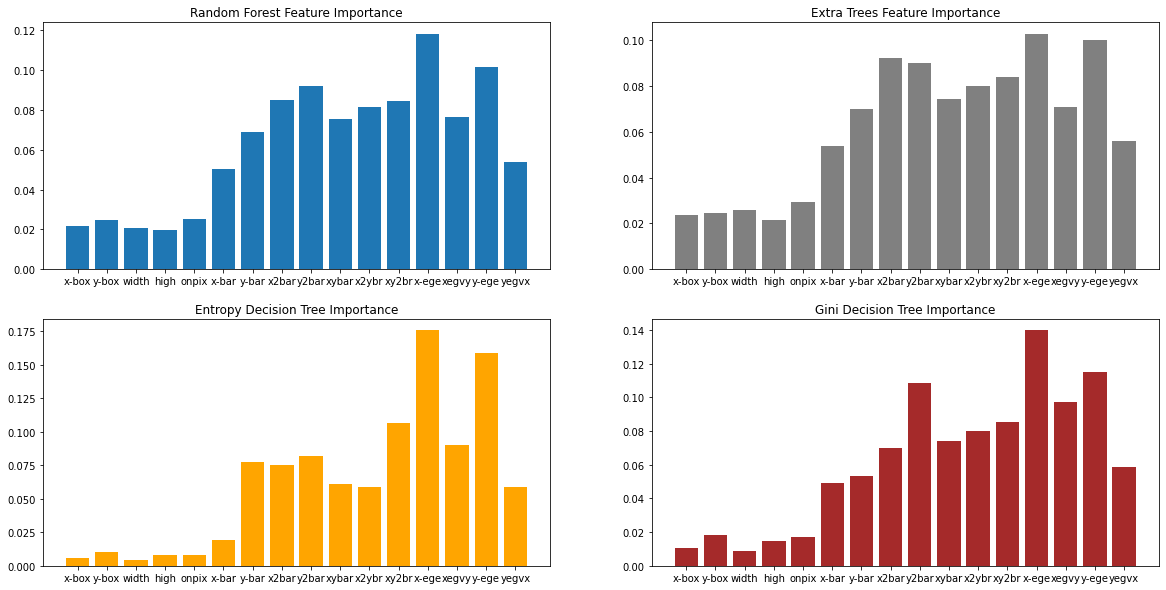

In [60]:
pyplot.figure(figsize=[20, 10])

pyplot.subplot(221).set_title("Random Forest Feature Importance")
pyplot.bar(X.columns, importance)

pyplot.subplot(222).set_title("Extra Trees Feature Importance")
pyplot.bar(X.columns, etc_importance, color="grey")

pyplot.subplot(223).set_title("Entropy Decision Tree Importance")
pyplot.bar(X.columns, dt_entropy_importance, color="orange")

pyplot.subplot(224).set_title("Gini Decision Tree Importance")
pyplot.bar(X.columns, dt_gini_importance, color="brown")

pyplot.show()

The most significant characteristics for all models are X-ege and Y-ege, while the remainder of the feature choice varies between models.

Task 8. Train K-Means on the dataset, and plot the Elbow and Silhouette inertia values (see Notebook 9 (Links to an external site.)). Explain the results.

In [66]:
#import library

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# scaling data as K-means works better on scaled data
scaler = StandardScaler()
scaler.fit(X)
K_mean_X =  pd.DataFrame(scaler.transform(X), columns=X.columns)

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(K_mean_X) for k in range(1, 10)] 
inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[320000.0000000007, 263292.92609286756, 236712.44096701153, 220558.48884850153, 206889.47508939574, 197114.14390296693, 188466.1047319437, 180559.3955177667, 173693.70427809583]


As the distance from the centroid decreases, inertia reduces.

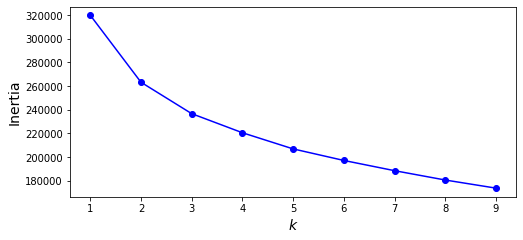

In [62]:
# plotting Elbow plot

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

The elbow diagram suggests that there should be two clusters (k = 2). To find the ideal number of clusters, we must find the value of k at the "elbow," that is, the point at which the distortion/inertia begins to decrease linearly.

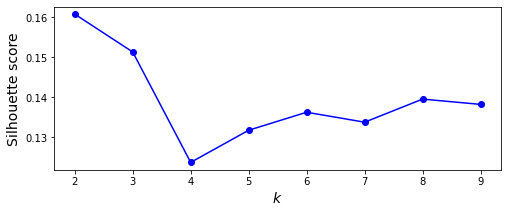

In [63]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(K_mean_X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

At K=2, the silhouette score seems thick and well-separated (it is closest to 1). At k=4, a score close to 0 indicates that clusters are overlapping and that data relating to clusters may be inaccurate.

**Task 9.** Create a 3D plot (see below) of the target concept against the two most influential features from Step 7. How does the visualized data match the results obtained in Step 7? 

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

-- Set up data for three-dimensional scattered points; use the 26 labels for color map
ax.scatter3D(xdata, ydata, zdata, c=zdata)

-- rotate the axes and update the view
ax.view_init(30, 45)
plt.draw()

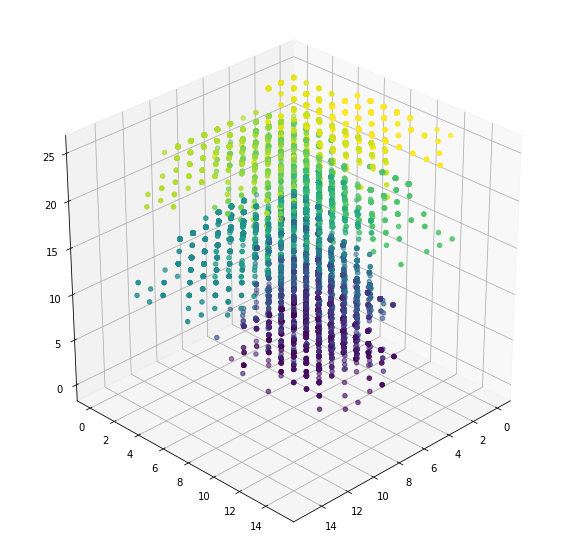

In [67]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(xs=X["x-ege"], ys=X["y-ege"], zs=Y, c=Y)
ax.view_init(30, 45)
plt.draw()

Task 10.  Summary:
The Letter Recognition dataset was used in this exercise. these are the finidings:
1. data doesn't contain any null value,so we don't need to clear and prepare dataset for operation.
2. All column is numeric except target column 'class'.
3. Best cross validation score:
   A. Voting Classifier performance is 95.6%. 
   B. Extra Tree Classifier performance is 96.8%.
   C. Random Forest Classifier performance is 95.8%
4. The elbow and sihlouette plots indicate the optimal number of clusters for K-means is 2
5. As illustrated in the 3D figure, the two characteristics x-ege and y-ege are able to partition the target into discrete differentiable clusters.
